In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
def graph_1():
    file_path = "Q1/Q1.npy"

    results = np.load(file_path, allow_pickle = True)

    mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/10)[i*250:(i+1)*250]) for i in range(80)])
    var = np.array([np.var((np.sum(np.array(results), axis = 0)/10)[i*250:(i+1)*250]) for i in range(80)])
    
    plt.plot(np.arange(80),mean)
    plt.fill_between(np.arange(80), mean-var/2, mean+var/2, alpha = 0.2)
    plt.title("Average reward over time with Q-Learning (0.1) versus Optimal Player(0.5). Variance confidence interval")
    plt.xlabel("Batch of 250 games")
    plt.ylabel("Average reward")
    
    plt.rcParams["figure.figsize"] = (20,12)
    
    plt.show()

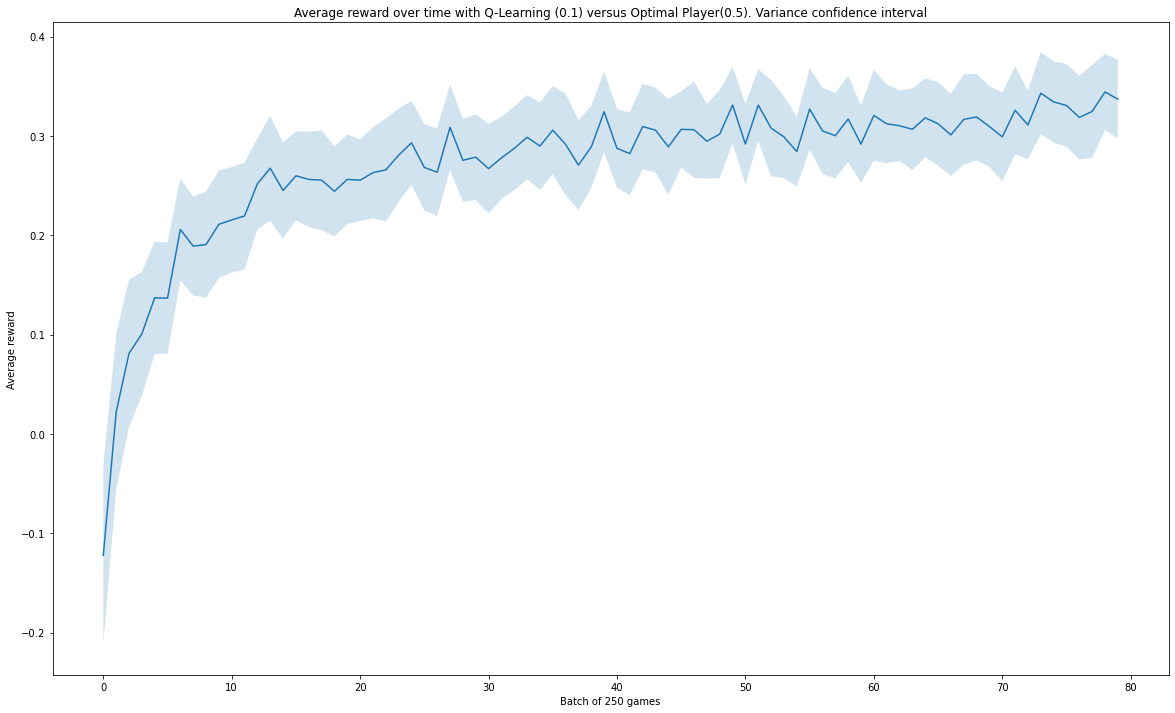

In [308]:
graph_1()

In [142]:
[np.mean(results[i*250:(i+1)*250], axis=) for i in range(80)]

array([[-1, -1, -1, ...,  1,  0,  1],
       [-1, -1, -1, ...,  1,  0,  0],
       [-1, -1,  1, ...,  1,  0,  0],
       ...,
       [-1,  1, -1, ...,  0,  0,  1],
       [-1,  0, -1, ...,  1,  1,  1],
       [ 1,  0, -1, ...,  1,  0, -1]])

In [146]:
np.sum(np.array(results), axis = 0).shape

(20000,)

In [63]:
def graph_2():
    
    palette = plt.get_cmap('Blues')
    plt.title("Average reward over time with Q-Learning for various n* versus Optimal Player(0.5)")
    n_list = [1,1000,5000,10000,15000,20000,25000,30000,40000]
    
    for j in range(len(n_list)):
        file_name = 'Q2_n' + str(n_list[j])
        file_path = 'Q2' + "/" + file_name + ".npy"
        
        results = np.load(file_path, allow_pickle = True)
        
        mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
        
        plt.plot(np.arange(80), mean, color=palette(j*30 + 80),
                 label='Avg Reward n*=' + f'{n_list[j]}')
        

        plt.xlabel("Batch of 250 games")
        plt.ylabel("Average reward")
        plt.rcParams["figure.figsize"] = (20,12)
        
        plt.legend(loc=4, ncol=2)
    plt.show()    

In [ ]:
#WITH CONFIDENCE INTERVAL

def graph_2():
    
    palette = plt.get_cmap('Blues')
    plt.title("Average reward over time with Q-Learning for various n* versus Optimal Player(0.5)")
    n_list = [1,1000,5000,10000,15000,20000,25000,30000,40000]
    
    for j in range(len(n_list)):
        file_name = 'Q2_n' + str(n_list[j])
        file_path = 'Q2' + "/" + file_name + ".npy"
        
        results = np.load(file_path, allow_pickle = True)
        
        mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
        var = np.array([np.var((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
        
        plt.plot(np.arange(80), mean, color=palette(j*30 + 80),
                 label='Avg Reward n*=' + f'{n_list[j]}')
        plt.fill_between(np.arange(80), mean-var/2, mean+var/2, alpha = 0.1, color=palette(j*30 + 80))
        

        plt.xlabel("Batch of 250 games")
        plt.ylabel("Average reward")
        plt.rcParams["figure.figsize"] = (20,12)
        
        plt.legend(loc=4, ncol=2)
    plt.show() 

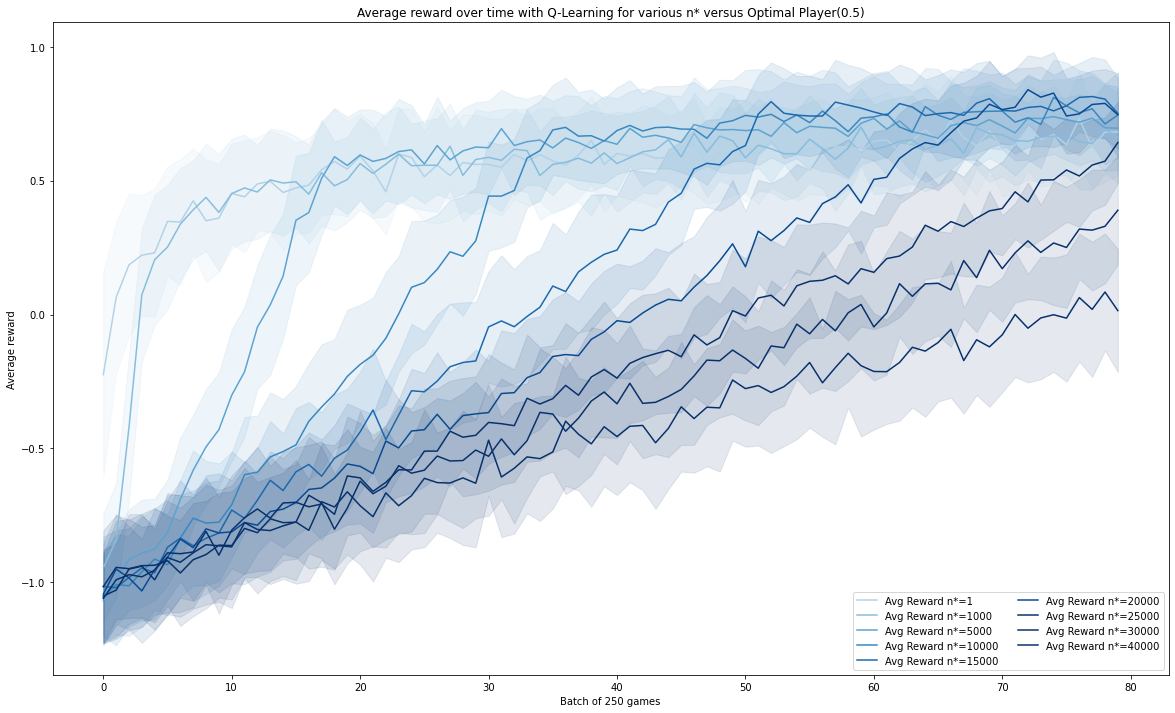

In [62]:
graph_2()

In [197]:
# 2 SUBPLOTS
def graph(Q):
    value_str = var_dict[Q]
    value_print_str = var_print_dict[Q]
    value_list = val_list_dict[Q]
    
    M_list = ['rand','opt']
    even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
    odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

    M_rand = []
    M_opt = []
    M = [M_rand, M_opt]
    for m in range(2):
        for j in value_list:
            file_name = 'Q' + str(Q) + '_' + M_list[m] + '_' + value_str + str(j)
            file_path = 'Q' + str(Q) + "/" + file_name + ".npy"
            
#             print(file_path) ####RIMUOVERE QUANDO FUNZIONA TUTTO

            rewards = np.load(file_path, allow_pickle = True)
    
            rewards[:,:,::2]  = np.vectorize(even_dict.__getitem__)(rewards[:,:,::2])
            rewards[:,:,1::2] = np.vectorize(odd_dict.__getitem__)(rewards[:,:,1::2])

            M[m].append(rewards.mean(axis=2).mean(axis=0))
    
    palette_opt = plt.get_cmap('YlOrRd')
    palette_rand = plt.get_cmap('Blues')
    
    fig, ax = plt.subplots(1,2, figsize=(15,8))

    for i in range(len(M_opt)):
        ax[0].plot(np.arange(80), M_opt[i], color=palette_opt(i*30 + 50),
                 label='$M_{opt}$ ' + value_print_str + f'= {value_list[i]}')
        
        ax[0].legend(loc=4, ncol=2)
        ax[0].set_xlabel('Batch of 250 games')
        ax[0].set_ylabel('M')
        ax[0].set_ylim([-1, 0.05])

    for i in range(len(M_rand)):
        ax[1].plot(np.arange(80), M_rand[i], color=palette_rand(i*30 + 50),
                 label='$M_{rand}$ ' + value_print_str + f'= {value_list[i]}')

        ax[1].legend(loc=2, ncol=2)
        ax[1].set_xlabel('Batch of 250 games')
        ax[1].set_ylabel('M')
        ax[1].set_ylim([0.2, 1.05])

    fig.suptitle(title_dict[Q], fontsize=12, fontweight=0)
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)

    plt.show()

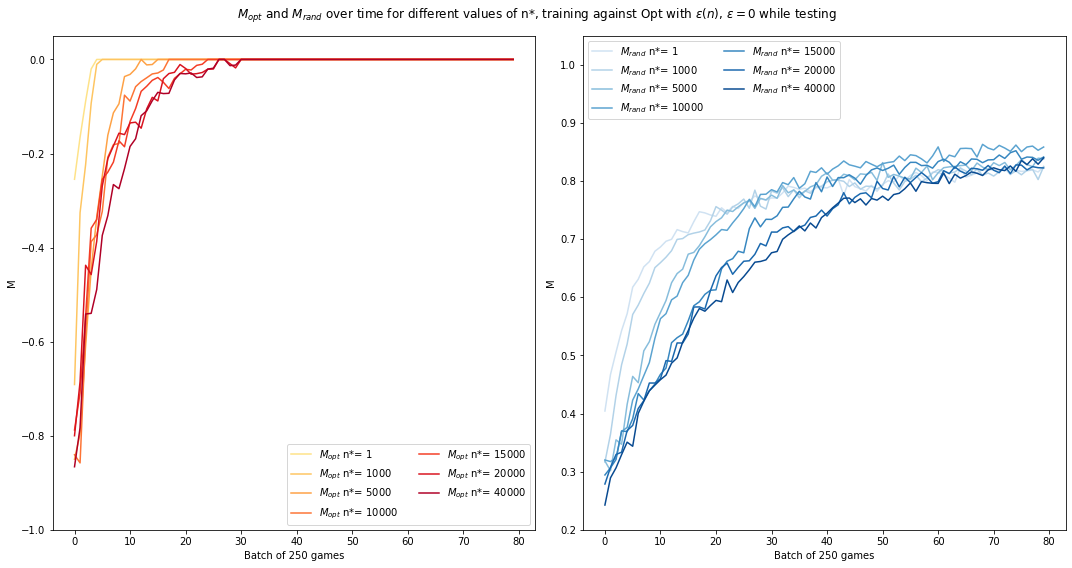

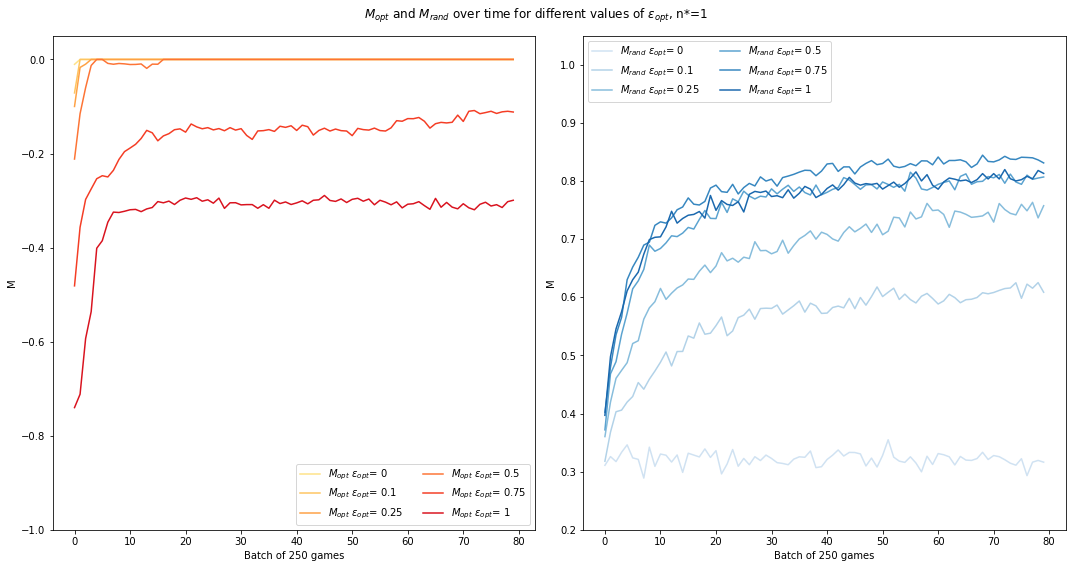

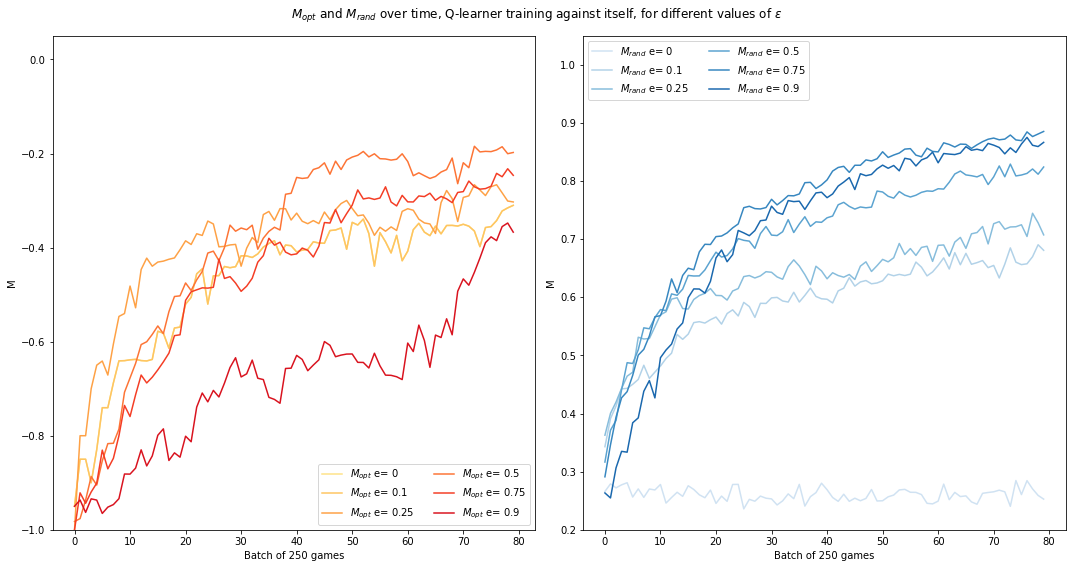

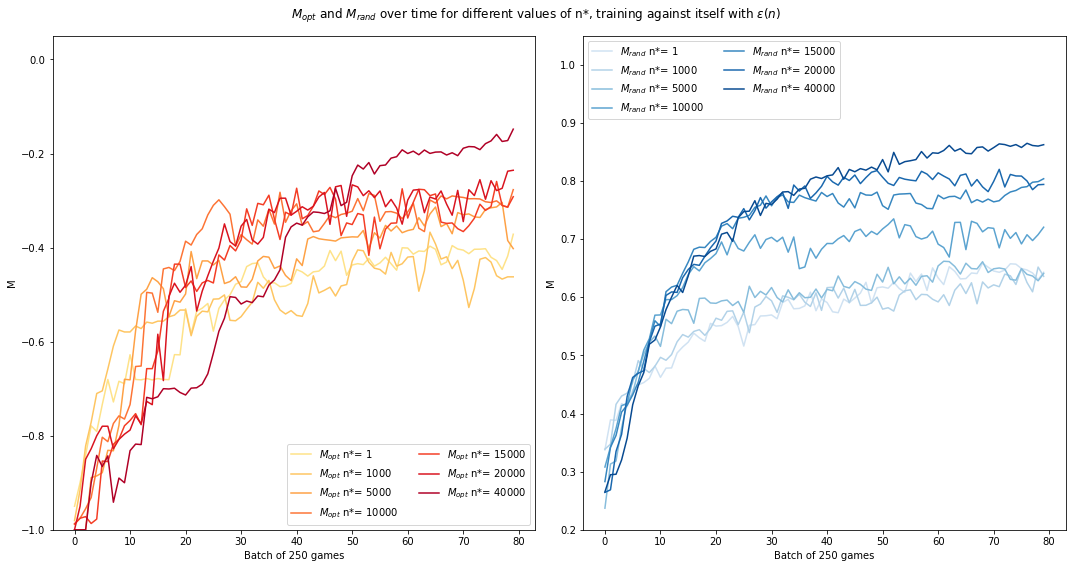

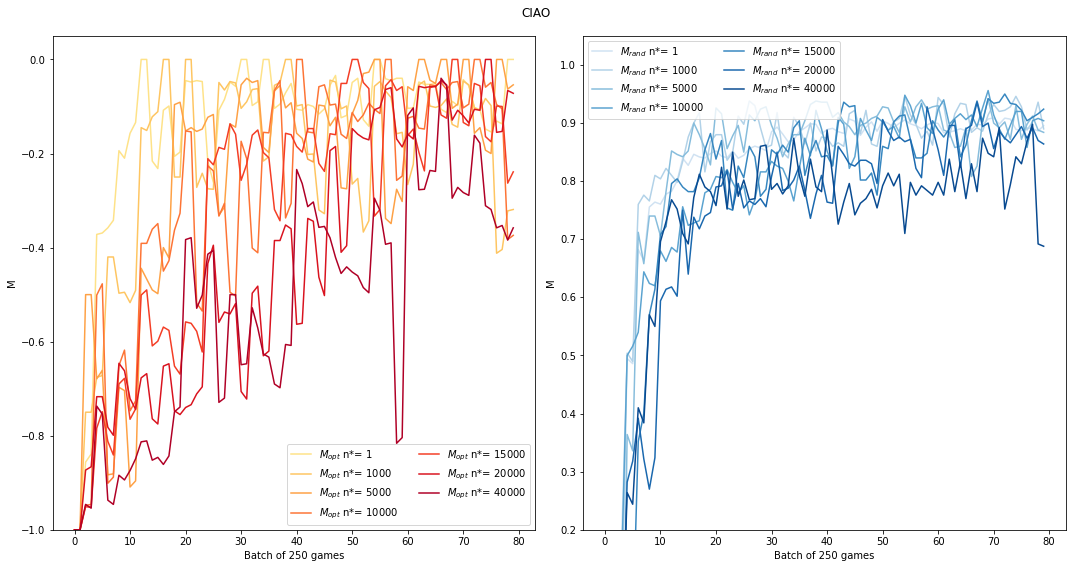

In [360]:
e_list = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
e_list_1 = [0, 0.1, 0.25, 0.5, 0.75, 1]
n_list = [1,1000,5000,10000,15000,20000,40000]

var_dict = {3: 'n', 4: 'e', 7: 'e', 8: 'n', 13:'n'}
var_print_dict = {3: 'n*', 4: '$\epsilon_{opt}$', 7: 'e', 8: 'n*', 13: 'n*'}
val_list_dict = {3: n_list, 4: e_list_1, 7: e_list, 8: n_list, 13: n_list}

# xlabel_dict = {3: 'Batch of 250 games'}
# ylabel_dict = {3: 'M'}
# in case use ylabel_dict[Q] and xlabel_dict[Q] instead of fixed text for plt.x/ylabel

title_dict = {3: '$M_{opt}$ and $M_{rand}$ over time for different values of n*, training against Opt with $\epsilon(n)$, $\epsilon=0$ while testing',
             4: '$M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon_{opt}$, n*=1', 
             7: '$M_{opt}$ and $M_{rand}$ over time, Q-learner training against itself, for different values of $\epsilon$',
             8: '$M_{opt}$ and $M_{rand}$ over time for different values of n*, training against itself with $\epsilon(n)$',
                13: 'CIAO'}

for Q in [3,4, 7, 8, 13]:
    graph(Q)

In [404]:
#PER MERGIARE RUNS
key = 0
var = 'e'
tipo = 'rand'
Q = 14
rewards_merge = []
for i in range(1,3):
    
    file_path = "Q" + str(Q) + "_merge/Q" + str(Q) + "_" + tipo + "_" + var + str(key) + "_merge" + str(i) + ".npy"
    rewards_merge.append(np.load(file_path, allow_pickle = True))
   
    print(file_path + '\n')    

    if i == 2:
        rewards = np.append(rewards_merge[i-1], rewards_merge[i-2],axis = 0)
        
    elif i>2:
        rewards = np.append(rewards, rewards_merge[i-1],axis = 0)

save_path = "Q" + str(Q) + "/Q" + str(Q) + "_" + tipo + "_" + var + str(key) + "_MERGED.npy"
print("save path: \n" + save_path)
np.save(save_path, rewards)


Q14_merge/Q14_rand_e0_merge1.npy

Q14_merge/Q14_rand_e0_merge2.npy

save path: 
Q14/Q14_rand_e0_MERGED.npy


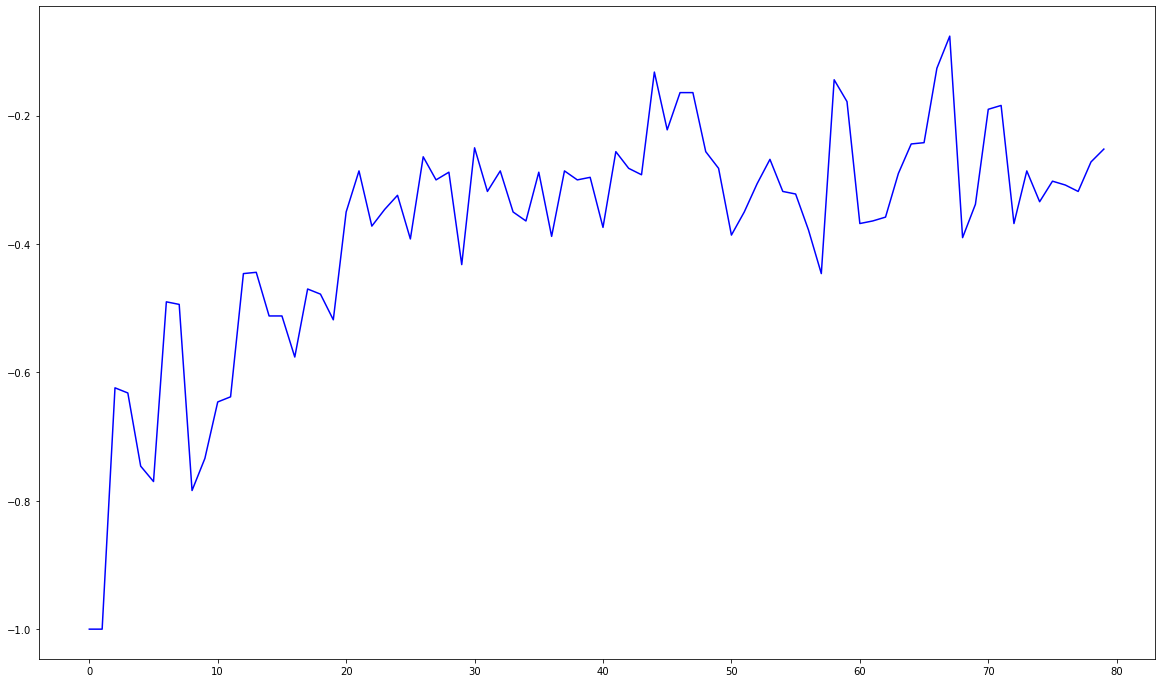

In [405]:
### TEST GRAPHS
file_path = save_path

even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

rewards = np.load(file_path, allow_pickle = True)

rewards[:,:,::2]  = np.vectorize(even_dict.get)(rewards[:,:,::2])
rewards[:,:,1::2] = np.vectorize(odd_dict.get)(rewards[:,:,1::2])

plt.plot(np.arange(80), rewards.mean(axis=2).mean(axis=0), color='Blue')
plt.show()

In [505]:
import random as rand
import seaborn as sns

def extract_qvals(assignments, qvals, num = None):
    if num == None:
        num = rand.randint(0, len(assignments))
        
    print(num)
    
    qval = qvals[num]
    board = list(assignments)[num]

#     print('\n' + board + '\n')
    
#     print(qval[:3])
#     print(qval[3:6])
#     print(qval[6:])
    
    return qval, board


In [467]:
replace_dict = {'0': '-', '1':'X', '-1':'O'}
def replace_with_dict(ar, dic):
    k = np.array(list(dic.keys()))
    v = np.array(list(dic.values()))

    # Get argsort indices
    sidx = k.argsort()
  
    return v[sidx[np.searchsorted(k,ar,sorter=sidx)]]

241


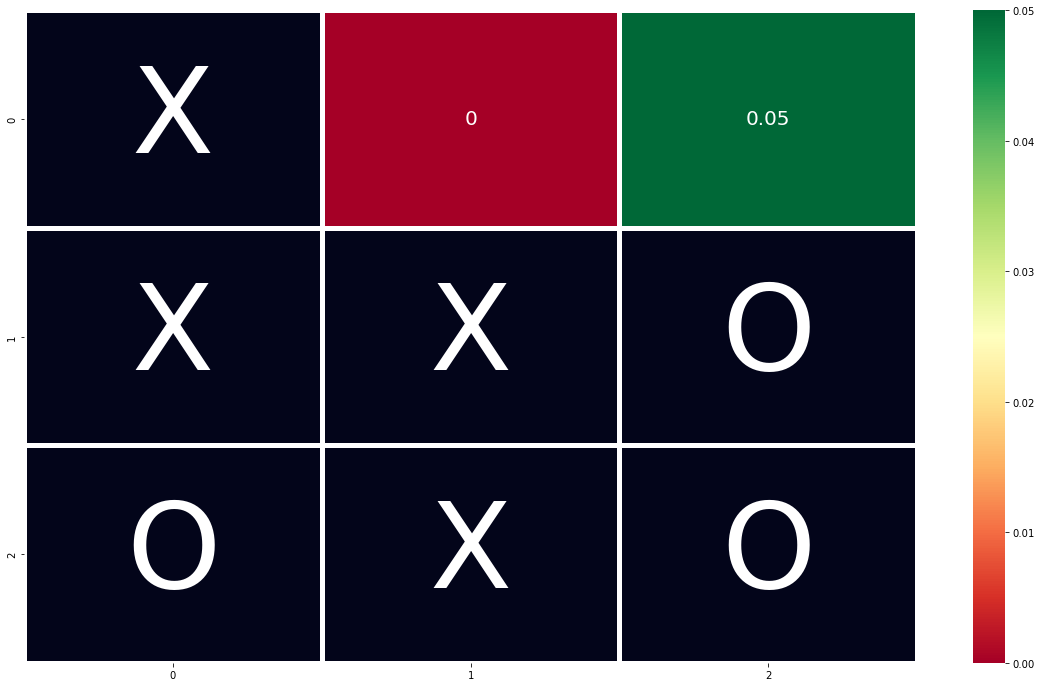

In [530]:
# Load
assignments = np.load('Q10/Q10_boards.npy',allow_pickle=True).item()
qvals = np.load('Q10/Q10_qvals.npy',allow_pickle=True).item()

qv,ass = extract_qvals(assignments, qvals)

data = qv.reshape((3,3))
labels =  np.array(ass[3:-3].replace(']\n [','').replace(' ', '').split('.')).reshape((3,3))

labels = replace_with_dict(labels, replace_dict)

sns.heatmap(data, cmap='RdYlGn',annot = data, annot_kws={"size":20}) #, vmin=-0.25, vmax=.25)

data = np.nan_to_num(data, nan=-9999)
sns.heatmap(data,  mask=data > -100, annot = labels, fmt = '', 
            color='Black', cbar=False, annot_kws={"size":120}, linewidths=5, linecolor='white')

plt.show()


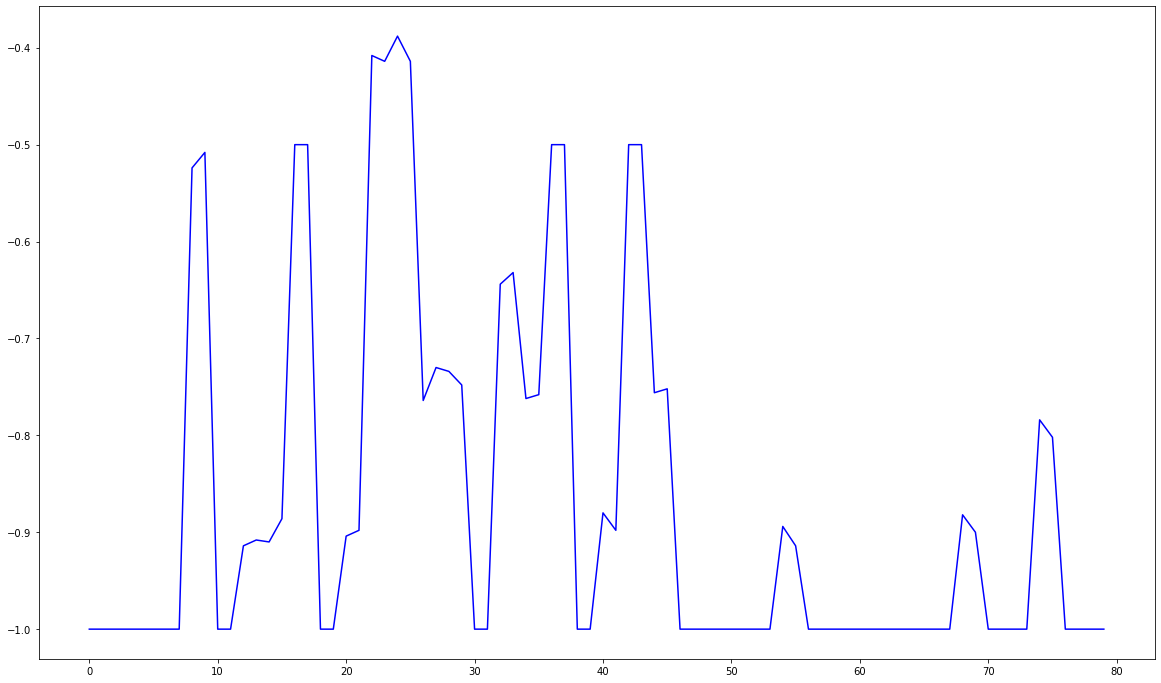

In [532]:
copy_path = r"C:\Users\artur\Downloads\Q16_opt_e0_test2.npy"

reward = np.load(copy_path,allow_pickle=True)
rewards1 = np.load(copy_path,allow_pickle=True)
rewards = np.append(reward, rewards1,axis = 0)

even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

rewards[:,:,::2]  = np.vectorize(even_dict.get)(rewards[:,:,::2])
rewards[:,:,1::2] = np.vectorize(odd_dict.get)(rewards[:,:,1::2])

plt.plot(np.arange(80), rewards.mean(axis=2).mean(axis=0), color='Blue')

In [418]:
rewards[-1][-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,